Change Model Parameters

In [2]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam


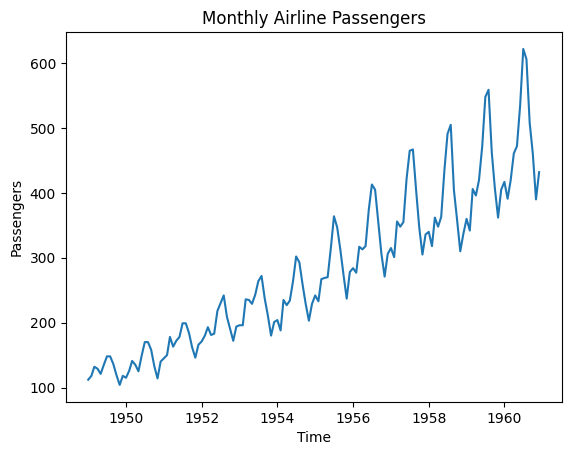

In [3]:
# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
df = pd.read_csv(url)
df.columns = ['Month', 'Passengers']
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

plt.plot(df['Passengers'])
plt.title("Monthly Airline Passengers")
plt.xlabel("Time")
plt.ylabel("Passengers")
plt.show()


In [4]:
# Preprocessing
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[['Passengers']])

# Function to create sequences
def create_dataset(data, time_step=12):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:i+time_step])
        y.append(data[i+time_step])
    return np.array(X), np.array(y)

time_step = 12
X, y = create_dataset(scaled_data, time_step)

# Reshape input to be [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split into train, validation, test
train_size = int(len(X) * 0.7)
val_size = int(len(X) * 0.15)

X_train = X[:train_size]
y_train = y[:train_size]

X_valid = X[train_size:train_size+val_size]
y_valid = y[train_size:train_size+val_size]

X_test = X[train_size+val_size:]
y_test = y[train_size+val_size:]


In [5]:
# Define LSTM model with changed parameters
def create_model(timesteps):
    model = Sequential()
    model.add(LSTM(128, return_sequences=True, input_shape=(timesteps, 1), name='lstm_1'))
    model.add(Dropout(0.2))
    model.add(LSTM(32, name='lstm_2'))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(
        loss='mean_squared_error',
        optimizer=Adam(learning_rate=0.01),
        metrics=['mean_absolute_error']
    )
    return model

# Create and show model
model = create_model(timesteps=time_step)
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 12, 128)        │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 32)             │        20,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 87,201 (340.63 KB)

 Trainable params: 87,201 (340.63 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Callbacks and Training
es = EarlyStopping(monitor='val_mean_absolute_error', patience=15, verbose=1)
mc = ModelCheckpoint('best_model.h5', save_best_only=True)

fit = model.fit(
    X_train, y_train,
    batch_size=32,
    epochs=100,
    verbose=2,
    validation_data=(X_valid, y_valid),
    callbacks=[es, mc]
)


Epoch 1/100


3/3 - 6s - 2s/step - loss: 0.0441 - mean_absolute_error: 0.1544 - val_loss: 0.2659 - val_mean_absolute_error: 0.5003
Epoch 2/100


3/3 - 0s - 102ms/step - loss: 0.0607 - mean_absolute_error: 0.2080 - val_loss: 0.1568 - val_mean_absolute_error: 0.3817
Epoch 3/100


3/3 - 0s - 57ms/step - loss: 0.0342 - mean_absolute_error: 0.1424 - val_loss: 0.0288 - val_mean_absolute_error: 0.1337
Epoch 4/100


3/3 - 0s - 59ms/step - loss: 0.0202 - mean_absolute_error: 0.1222 - val_loss: 0.0258 - val_mean_absolute_error: 0.1211
Epoch 5/100
3/3 - 0s - 88ms/step - loss: 0.0169 - mean_absolute_error: 0.1004 - val_loss: 0.0703 - val_mean_absolute_error: 0.2423
Epoch 6/100
3/3 - 0s - 47ms/step - loss: 0.0181 - mean_absolute_error: 0.0986 - val_loss: 0.0401 - val_mean_absolute_error: 0.1681
Epoch 7/100


3/3 - 0s - 112ms/step - loss: 0.0110 - mean_absolute_error: 0.0840 - val_loss: 0.0138 - val_mean_absolute_error: 0.0809
Epoch 8/100


3/3 - 0s - 98ms/step - loss: 0.0117 - mean_absolute_error: 0.0902 - val_loss: 0.0133 - val_mean_absolute_error: 0.0824
Epoch 9/100
3/3 - 0s - 48ms/step - loss: 0.0086 - mean_absolute_error: 0.0659 - val_loss: 0.0205 - val_mean_absolute_error: 0.1302
Epoch 10/100


3/3 - 0s - 114ms/step - loss: 0.0103 - mean_absolute_error: 0.0793 - val_loss: 0.0129 - val_mean_absolute_error: 0.0954
Epoch 11/100
3/3 - 0s - 83ms/step - loss: 0.0073 - mean_absolute_error: 0.0638 - val_loss: 0.0190 - val_mean_absolute_error: 0.0958
Epoch 12/100


3/3 - 0s - 56ms/step - loss: 0.0076 - mean_absolute_error: 0.0676 - val_loss: 0.0124 - val_mean_absolute_error: 0.0863
Epoch 13/100


3/3 - 0s - 116ms/step - loss: 0.0089 - mean_absolute_error: 0.0793 - val_loss: 0.0123 - val_mean_absolute_error: 0.0874
Epoch 14/100
3/3 - 0s - 89ms/step - loss: 0.0060 - mean_absolute_error: 0.0628 - val_loss: 0.0137 - val_mean_absolute_error: 0.0819
Epoch 15/100
3/3 - 0s - 99ms/step - loss: 0.0064 - mean_absolute_error: 0.0613 - val_loss: 0.0130 - val_mean_absolute_error: 0.0978
Epoch 16/100
3/3 - 0s - 88ms/step - loss: 0.0069 - mean_absolute_error: 0.0664 - val_loss: 0.0206 - val_mean_absolute_error: 0.1297
Epoch 17/100
3/3 - 0s - 61ms/step - loss: 0.0058 - mean_absolute_error: 0.0601 - val_loss: 0.0124 - val_mean_absolute_error: 0.0820
Epoch 18/100


3/3 - 0s - 104ms/step - loss: 0.0066 - mean_absolute_error: 0.0599 - val_loss: 0.0119 - val_mean_absolute_error: 0.0835
Epoch 19/100
3/3 - 0s - 59ms/step - loss: 0.0056 - mean_absolute_error: 0.0580 - val_loss: 0.0137 - val_mean_absolute_error: 0.1020
Epoch 20/100
3/3 - 0s - 49ms/step - loss: 0.0066 - mean_absolute_error: 0.0608 - val_loss: 0.0119 - val_mean_absolute_error: 0.0921
Epoch 21/100
3/3 - 0s - 48ms/step - loss: 0.0068 - mean_absolute_error: 0.0609 - val_loss: 0.0126 - val_mean_absolute_error: 0.0972
Epoch 22/100
3/3 - 0s - 47ms/step - loss: 0.0062 - mean_absolute_error: 0.0593 - val_loss: 0.0166 - val_mean_absolute_error: 0.1159
Epoch 22: early stopping


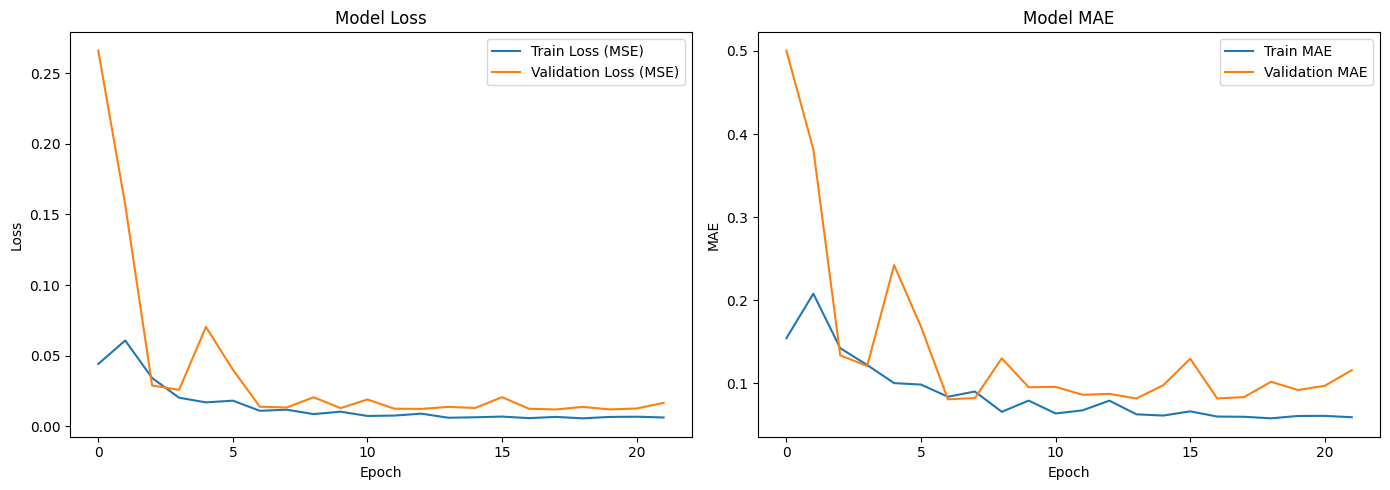

In [7]:
# Plot training history
fig, (axL, axR) = plt.subplots(1, 2, figsize=(14, 5))

axL.plot(fit.history['loss'], label="Train Loss (MSE)")
axL.plot(fit.history['val_loss'], label="Validation Loss (MSE)")
axL.set_title("Model Loss")
axL.set_xlabel("Epoch")
axL.set_ylabel("Loss")
axL.legend()

axR.plot(fit.history['mean_absolute_error'], label="Train MAE")
axR.plot(fit.history['val_mean_absolute_error'], label="Validation MAE")
axR.set_title("Model MAE")
axR.set_xlabel("Epoch")
axR.set_ylabel("MAE")
axR.legend()

plt.tight_layout()
plt.show()


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 474ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


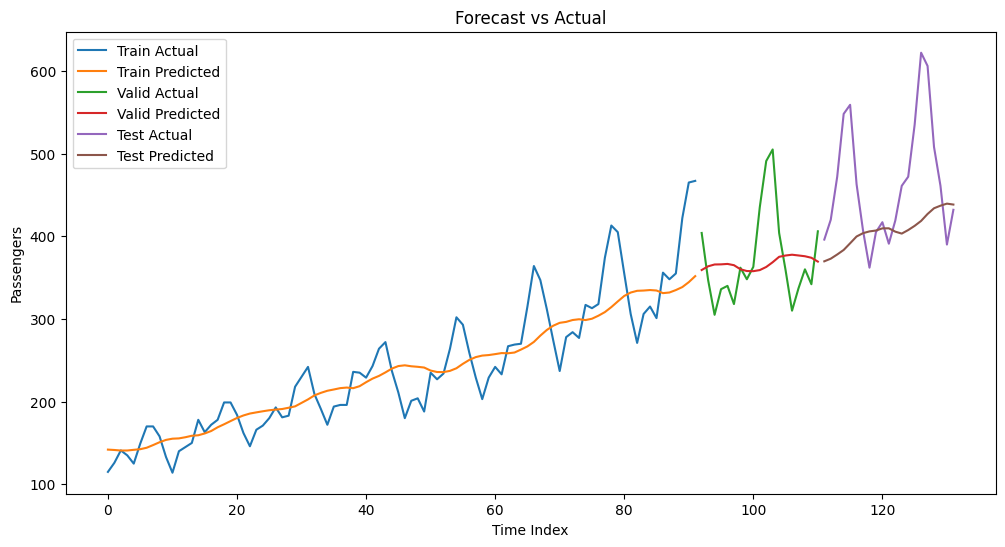

Train → RMSE: 37.48, MAE: 28.12
Validation → RMSE: 56.50, MAE: 43.26
Test → RMSE: 92.04, MAE: 68.21


In [9]:
# Evaluation
model = load_model('best_model.h5')

# Predict and inverse scale
pred_train = model.predict(X_train)
pred_valid = model.predict(X_valid)
pred_test = model.predict(X_test)

pred_train = scaler.inverse_transform(pred_train).flatten()
pred_valid = scaler.inverse_transform(pred_valid).flatten()
pred_test = scaler.inverse_transform(pred_test).flatten()

y_train_orig = scaler.inverse_transform(y_train).flatten()
y_valid_orig = scaler.inverse_transform(y_valid).flatten()
y_test_orig = scaler.inverse_transform(y_test).flatten()

# Plot predictions
plt.figure(figsize=(12, 6))
plt.plot(np.arange(len(y_train_orig)), y_train_orig, label="Train Actual")
plt.plot(np.arange(len(y_train_orig)), pred_train, label="Train Predicted")
plt.plot(np.arange(len(y_train_orig), len(y_train_orig) + len(y_valid_orig)), y_valid_orig, label="Valid Actual")
plt.plot(np.arange(len(y_train_orig), len(y_train_orig) + len(y_valid_orig)), pred_valid, label="Valid Predicted")
plt.plot(np.arange(len(y_train_orig) + len(y_valid_orig), len(y_train_orig) + len(y_valid_orig) + len(y_test_orig)), y_test_orig, label="Test Actual")
plt.plot(np.arange(len(y_train_orig) + len(y_valid_orig), len(y_train_orig) + len(y_valid_orig) + len(y_test_orig)), pred_test, label="Test Predicted")
plt.legend()
plt.title("Forecast vs Actual")
plt.xlabel("Time Index")
plt.ylabel("Passengers")
plt.show()

# Print metrics
def print_metrics(true, pred, label):
    rmse = np.sqrt(mean_squared_error(true, pred))
    mae = mean_absolute_error(true, pred)
    print(f"{label} → RMSE: {rmse:.2f}, MAE: {mae:.2f}")

print_metrics(y_train_orig, pred_train, "Train")
print_metrics(y_valid_orig, pred_valid, "Validation")
print_metrics(y_test_orig, pred_test, "Test")
